# Regression Model

## 1.Data Loading and Exploration

### Import Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


### Load the data

In [32]:
df = pd.read_csv('water_consumption_100000_rows.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (100000, 38)

First few rows:


,date,day_of_week,is_weekend,is_holiday,month,season,temperature_celsius,max_temperature_celsius,min_temperature_celsius,humidity_percent,...,supply_restriction_flag,demand_supply_gap,consumption_per_capita,temperature_change_from_yesterday,rainfall_last_3_days,input_temperature,input_humidity,input_rainfall,input_day_type,scenario_temperature_change
0,2019-01-01,Tuesday,0,1,1,Winter,29.8,33.6,25.5,54,...,1,-7521135,278.29,0.2,2.9,29.8,54,0.3,Holiday,-2
1,2019-01-02,Wednesday,0,0,1,Winter,22.5,28.3,15.6,55,...,0,-7191801,162.65,-1.9,4.0,22.5,55,0.3,Weekday,5
2,2019-01-03,Thursday,0,0,1,Winter,26.5,29.8,21.2,49,...,0,-11366988,277.17,-4.8,5.0,26.5,49,2.2,Weekday,-4
3,2019-01-04,Friday,0,0,1,Winter,24.0,29.7,18.4,57,...,0,-6177491,194.36,4.7,11.2,24.0,57,1.8,Weekday,0
4,2019-01-05,Saturday,1,0,1,Winter,27.2,29.4,21.7,50,...,0,-11065969,242.86,3.1,5.6,27.2,50,0.6,Weekend,1


### Basic information about the dataset

In [33]:
print("Dataset Information:")
print("=" * 50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date                               100000 non-null  object 
 1   day_of_week                        100000 non-null  object 
 2   is_weekend                         100000 non-null  int64  
 3   is_holiday                         100000 non-null  int64  
 4   month                              100000 non-null  int64  
 5   season                             100000 non-null  object 
 6   temperature_celsius                100000 non-null  float64
 7   max_temperature_celsius            100000 non-null  float64
 8   min_temperature_celsius            100000 non-null  float64
 9   humidity_percent                   100000 non-null  int64  
 10  rainfall_mm                        100000 non-null  float64
 11  wind_speed_kmph    

### Statistical summary

In [34]:
df.describe()

,is_weekend,is_holiday,month,temperature_celsius,max_temperature_celsius,min_temperature_celsius,humidity_percent,rainfall_mm,wind_speed_kmph,heat_index,...,pipe_maintenance_flag,supply_restriction_flag,demand_supply_gap,consumption_per_capita,temperature_change_from_yesterday,rainfall_last_3_days,input_temperature,input_humidity,input_rainfall,scenario_temperature_change
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,0.285620,0.013690,6.51858,32.613893,36.615038,27.612133,62.42032,5.397604,10.001385,38.999768,...,0.050770,0.080760,-8.497593e+06,210.909342,0.005013,10.412982,32.613893,62.42032,5.397604,0.505630
std,0.451711,0.116201,3.44665,5.584141,5.701655,5.698273,12.47005,8.474576,3.459004,6.253028,...,0.219529,0.272468,5.736644e+06,56.922813,2.889628,9.879331,5.584141,12.47005,8.474576,2.870521
min,0.000000,0.000000,1.00000,22.000000,24.100000,15.100000,40.00000,0.000000,4.000000,26.200000,...,0.000000,0.000000,-4.664720e+07,74.640000,-5.000000,0.000000,22.000000,40.00000,0.000000,-4.000000
25%,0.000000,0.000000,4.00000,28.500000,32.400000,23.400000,53.00000,1.000000,7.000000,34.400000,...,0.000000,0.000000,-1.150610e+07,167.820000,-2.500000,4.000000,28.500000,53.00000,1.000000,-2.000000
50%,0.000000,0.000000,7.00000,31.800000,36.000000,27.000000,61.00000,2.200000,10.000000,38.200000,...,0.000000,0.000000,-7.076261e+06,205.250000,-0.000000,7.400000,31.800000,61.00000,2.200000,1.000000
75%,1.000000,0.000000,10.00000,36.500000,40.600000,31.600000,71.00000,5.700000,13.000000,43.200000,...,0.000000,0.000000,-4.163070e+06,248.150000,2.500000,13.300000,36.500000,71.00000,5.700000,3.000000
max,1.000000,1.000000,12.00000,45.000000,50.900000,41.900000,94.00000,50.000000,16.000000,53.500000,...,1.000000,1.000000,-3.163620e+05,449.960000,5.000000,95.100000,45.000000,94.00000,50.000000,5.000000


### Check for missing values

In [35]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values!")

Missing Values:
No missing values!


## 2.Data Preprocessing

### Convert date to datetime

In [36]:
df['date'] = pd.to_datetime(df['date'])

# Create a copy for modeling
df_model = df.copy()

print("Data preprocessing completed!")

Data preprocessing completed!


### Encode categorical variables

In [37]:

from sklearn.preprocessing import LabelEncoder

# Categorical columns to encode
categorical_cols = ['day_of_week', 'season', 'region_name', 'area_type', 'input_day_type']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col + '_encoded'] = le.fit_transform(df_model[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {len(le.classes_)} unique values")

print("\nCategorical encoding completed!")

Encoded day_of_week: 7 unique values
Encoded season: 5 unique values
Encoded region_name: 10 unique values
Encoded area_type: 3 unique values
Encoded input_day_type: 3 unique values

Categorical encoding completed!


## 3.Feature Engineering

### Select features for modeling

In [38]:

feature_columns = [
    'temperature_celsius',
    'max_temperature_celsius',
    'min_temperature_celsius',
    'humidity_percent',
    'rainfall_mm',
    'wind_speed_kmph',
    'heat_index',
    'population',
    'number_of_households',
    'industrial_activity_index',
    'is_weekend',
    'is_holiday',
    'month',
    'water_loss_percentage',
    'reservoir_level_percent',
    'pipe_maintenance_flag',
    'supply_restriction_flag',
    'day_of_week_encoded',
    'season_encoded',
    'region_name_encoded',
    'area_type_encoded'
]

target_column = 'water_consumption_liters'

# Create feature matrix X and target vector y
X = df_model[feature_columns].values
y = df_model[target_column].values

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures: {feature_columns}")

Feature matrix shape: (100000, 21)
Target vector shape: (100000,)

Features: ['temperature_celsius', 'max_temperature_celsius', 'min_temperature_celsius', 'humidity_percent', 'rainfall_mm', 'wind_speed_kmph', 'heat_index', 'population', 'number_of_households', 'industrial_activity_index', 'is_weekend', 'is_holiday', 'month', 'water_loss_percentage', 'reservoir_level_percent', 'pipe_maintenance_flag', 'supply_restriction_flag', 'day_of_week_encoded', 'season_encoded', 'region_name_encoded', 'area_type_encoded']


### Visualize target distribution

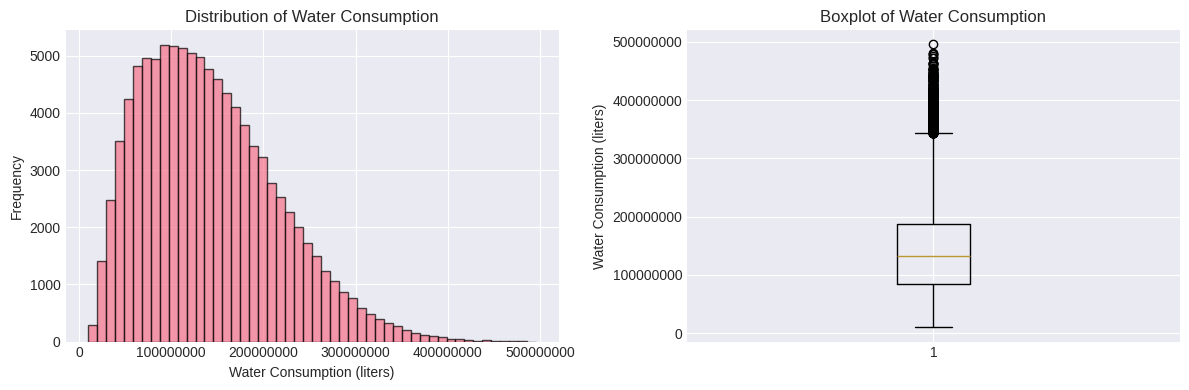

Mean water consumption: 141,654,945 liters
Std water consumption: 73,345,324 liters


In [39]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Water Consumption (liters)')
plt.ylabel('Frequency')
plt.title('Distribution of Water Consumption')
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(1, 2, 2)
plt.boxplot(y)
plt.ylabel('Water Consumption (liters)')
plt.title('Boxplot of Water Consumption')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

print(f"Mean water consumption: {y.mean():,.0f} liters")
print(f"Std water consumption: {y.std():,.0f} liters")

### Correlation heatmap for numerical features

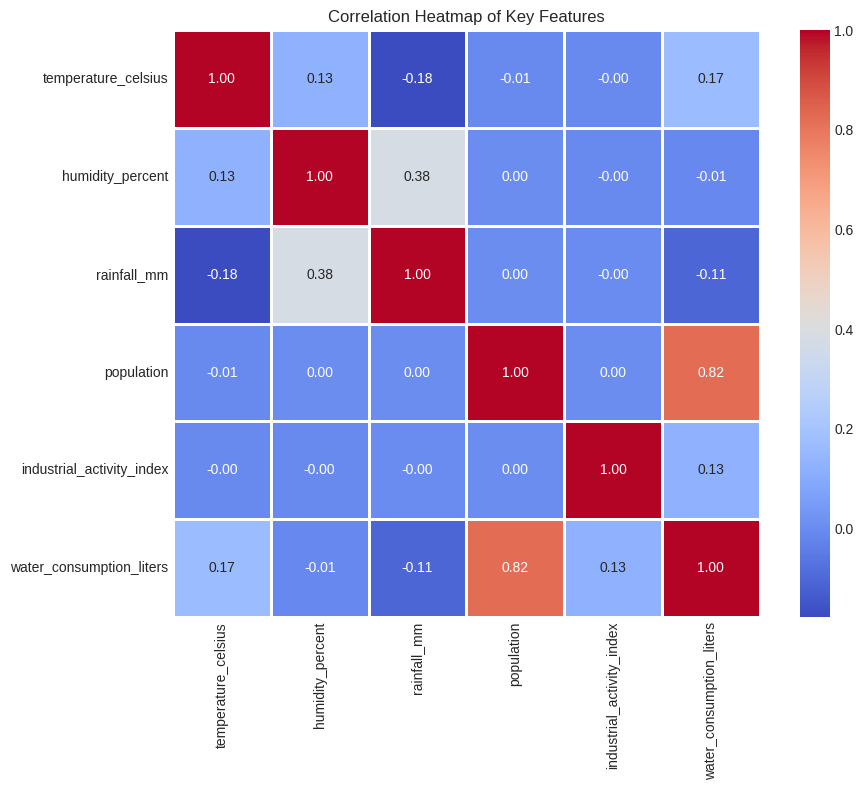

In [40]:

numerical_features = [
    'temperature_celsius', 'humidity_percent', 'rainfall_mm',
    'population', 'industrial_activity_index', 'water_consumption_liters'
]

plt.figure(figsize=(10, 8))
correlation_matrix = df_model[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=1)
plt.title('Correlation Heatmap of Key Features')
plt.tight_layout()
plt.show()

## 4.Train-Test Split and Feature Scaling

### Train-test split (80-20)

In [41]:

def train_test_split_manual(X, y, test_size=0.2, random_state=42):
    """
    Split data into train and test sets
    """
    np.random.seed(random_state)
    n_samples = len(X)
    n_test = int(n_samples * test_size)

    # Shuffle indices
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    # Split indices
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]:,}")
print(f"Test set size: {X_test.shape[0]:,}")
print(f"\nTrain-test split completed!")

Training set size: 80,000
Test set size: 20,000

Train-test split completed!


### Feature scaling

In [42]:

class StandardScaler:
    """
    Standardize features by removing the mean and scaling to unit variance
    """
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        """Calculate mean and standard deviation"""
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        # Avoid division by zero
        self.std_[self.std_ == 0] = 1
        return self

    def transform(self, X):
        """Standardize the data"""
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        """Fit and transform in one step"""
        self.fit(X)
        return self.transform(X)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"\nScaled training data shape: {X_train_scaled.shape}")
print(f"Mean of scaled features (should be ~0): {X_train_scaled.mean(axis=0)[:5]}")
print(f"Std of scaled features (should be ~1): {X_train_scaled.std(axis=0)[:5]}")

Feature scaling completed!

Scaled training data shape: (80000, 21)
Mean of scaled features (should be ~0): [ 2.95764108e-14  1.87132476e-14 -3.72418971e-15  2.46699883e-16
  3.86074506e-16]
Std of scaled features (should be ~1): [1. 1. 1. 1. 1.]


## 5.Linear Regression

In [43]:
class LinearRegressionNormal:
    """
    Linear Regression using Normal Equation (Closed-form solution)
    θ = (X^T X)^(-1) X^T y
    """
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Fit the model using normal equation
        """
        # Add bias term (column of ones)
        n_samples = X.shape[0]
        X_with_bias = np.c_[np.ones(n_samples), X]

        # Normal equation: θ = (X^T X)^(-1) X^T y
        theta = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y

        # Extract bias and weights
        self.bias = theta[0]
        self.weights = theta[1:]

        return self

    def predict(self, X):
        """
        Make predictions
        """
        return X @ self.weights + self.bias

# Train the model
print("Training Linear Regression (Normal Equation)...")
lr_normal = LinearRegressionNormal()
lr_normal.fit(X_train_scaled, y_train)

print("Training completed!")
print(f"Bias: {lr_normal.bias:,.2f}")
print(f"Number of weights: {len(lr_normal.weights)}")
print(f"First 5 weights: {lr_normal.weights[:5]}")

Training Linear Regression (Normal Equation)...
Training completed!
Bias: 141,627,231.80
Number of weights: 21
First 5 weights: [53202008.36675772   556733.68516104  -993170.58861934  4234716.55609627
 -6104839.5557097 ]


## 6.Linear Regression with Gradient Descent

In [44]:
class LinearRegressionGD:
    """
    Linear Regression using Gradient Descent
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000, verbose=False):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.verbose = verbose
        self.weights = None
        self.bias = None
        self.cost_history = []

    def _compute_cost(self, X, y, weights, bias):
        """
        Compute Mean Squared Error cost
        """
        n_samples = len(y)
        predictions = X @ weights + bias
        cost = (1 / (2 * n_samples)) * np.sum((predictions - y) ** 2)
        return cost

    def fit(self, X, y):
        """
        Fit the model using gradient descent
        """
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.n_iterations):
            # Predictions
            y_pred = X @ self.weights + self.bias

            # Compute gradients
            dw = (1 / n_samples) * (X.T @ (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Track cost
            cost = self._compute_cost(X, y, self.weights, self.bias)
            self.cost_history.append(cost)

            # Print progress
            if self.verbose and (i % 100 == 0 or i == self.n_iterations - 1):
                print(f"Iteration {i}: Cost = {cost:,.2f}")

        return self

    def predict(self, X):
        """
        Make predictions
        """
        return X @ self.weights + self.bias

# Train the model
print("Training Linear Regression (Gradient Descent)...\n")
lr_gd = LinearRegressionGD(learning_rate=0.01, n_iterations=1000, verbose=True)
lr_gd.fit(X_train_scaled, y_train)

print("\nTraining completed!")

Training Linear Regression (Gradient Descent)...

Iteration 0: Cost = 12,452,486,041,496,830.00
Iteration 100: Cost = 2,006,222,052,403,482.25
Iteration 200: Cost = 786,592,101,071,081.25
Iteration 300: Cost = 621,398,648,441,322.88
Iteration 400: Cost = 595,010,819,133,712.12
Iteration 500: Cost = 587,727,671,000,802.12
Iteration 600: Cost = 583,463,120,569,230.62
Iteration 700: Cost = 579,998,178,795,538.50
Iteration 800: Cost = 576,985,737,729,102.25
Iteration 900: Cost = 574,337,314,342,598.62
Iteration 999: Cost = 572,026,535,025,658.50

Training completed!


### Plot cost history

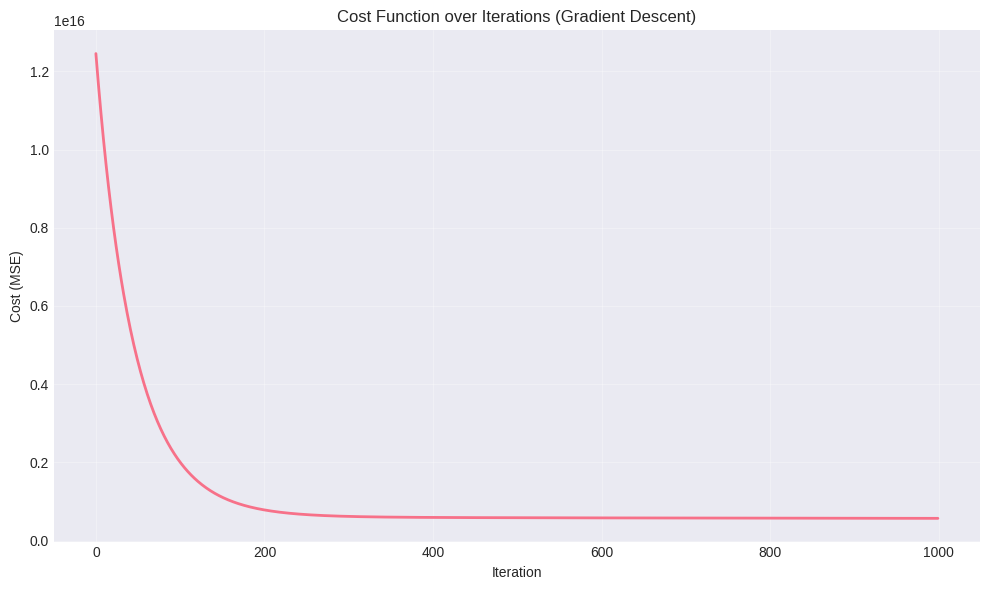

Initial cost: 12,452,486,041,496,830.00
Final cost: 572,026,535,025,658.50
Cost reduction: 95.41%


In [45]:

plt.figure(figsize=(10, 6))
plt.plot(lr_gd.cost_history, linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function over Iterations (Gradient Descent)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Initial cost: {lr_gd.cost_history[0]:,.2f}")
print(f"Final cost: {lr_gd.cost_history[-1]:,.2f}")
print(f"Cost reduction: {((lr_gd.cost_history[0] - lr_gd.cost_history[-1]) / lr_gd.cost_history[0] * 100):.2f}%")

## 7.Ridge Regression (L2 Regularization)

In [46]:
class RidgeRegression:
    """
    Ridge Regression with L2 regularization
    θ = (X^T X + λI)^(-1) X^T y
    """
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # Regularization strength
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Fit the model using regularized normal equation
        """
        n_samples, n_features = X.shape

        # Add bias term
        X_with_bias = np.c_[np.ones(n_samples), X]

        # Ridge regression: θ = (X^T X + λI)^(-1) X^T y
        # Create identity matrix (don't penalize bias)
        identity = np.eye(n_features + 1)
        identity[0, 0] = 0  # Don't regularize bias term

        # Solve ridge regression
        theta = np.linalg.inv(X_with_bias.T @ X_with_bias + self.alpha * identity) @ X_with_bias.T @ y

        # Extract bias and weights
        self.bias = theta[0]
        self.weights = theta[1:]

        return self

    def predict(self, X):
        """
        Make predictions
        """
        return X @ self.weights + self.bias

# Train Ridge Regression with different alpha values
alphas = [0.1, 1.0, 10.0, 100.0]
ridge_models = {}

print("Training Ridge Regression with different regularization strengths...\n")
for alpha in alphas:
    ridge = RidgeRegression(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_models[alpha] = ridge
    print(f"Alpha = {alpha}: Bias = {ridge.bias:,.2f}, L2 norm of weights = {np.linalg.norm(ridge.weights):.4f}")

print("\nRidge Regression training completed!")

Training Ridge Regression with different regularization strengths...

Alpha = 0.1: Bias = 141,627,231.80, L2 norm of weights = 89923129.4830
Alpha = 1.0: Bias = 141,627,231.80, L2 norm of weights = 73579724.2998
Alpha = 10.0: Bias = 141,627,231.80, L2 norm of weights = 66724198.3995
Alpha = 100.0: Bias = 141,627,231.80, L2 norm of weights = 65951117.9084

Ridge Regression training completed!


## 8.Model Evaluation

In [47]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """
    Evaluate regression model performance
    """
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    # Mean Squared Error (MSE)
    train_mse = np.mean((y_train - y_train_pred) ** 2)
    test_mse = np.mean((y_test - y_test_pred) ** 2)

    # Root Mean Squared Error (RMSE)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    # Mean Absolute Error (MAE)
    train_mae = np.mean(np.abs(y_train - y_train_pred))
    test_mae = np.mean(np.abs(y_test - y_test_pred))

    # R-squared (R²)
    ss_res_train = np.sum((y_train - y_train_pred) ** 2)
    ss_tot_train = np.sum((y_train - np.mean(y_train)) ** 2)
    train_r2 = 1 - (ss_res_train / ss_tot_train)

    ss_res_test = np.sum((y_test - y_test_pred) ** 2)
    ss_tot_test = np.sum((y_test - np.mean(y_test)) ** 2)
    test_r2 = 1 - (ss_res_test / ss_tot_test)

    # Mean Absolute Percentage Error (MAPE)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    # Print results
    print(f"\n{'='*60}")
    print(f"{model_name} - Performance Metrics")
    print(f"{'='*60}")
    print(f"\n{'Metric':<30} {'Train':<15} {'Test':<15}")
    print(f"{'-'*60}")
    print(f"{'MSE':<30} {train_mse:>14,.2f} {test_mse:>14,.2f}")
    print(f"{'RMSE':<30} {train_rmse:>14,.2f} {test_rmse:>14,.2f}")
    print(f"{'MAE':<30} {train_mae:>14,.2f} {test_mae:>14,.2f}")
    print(f"{'R² Score':<30} {train_r2:>14.4f} {test_r2:>14.4f}")
    print(f"{'MAPE (%)':<30} {train_mape:>14.2f} {test_mape:>14.2f}")
    print(f"{'='*60}\n")

    return {
        'train_mse': train_mse, 'test_mse': test_mse,
        'train_rmse': train_rmse, 'test_rmse': test_rmse,
        'train_mae': train_mae, 'test_mae': test_mae,
        'train_r2': train_r2, 'test_r2': test_r2,
        'train_mape': train_mape, 'test_mape': test_mape,
        'y_test_pred': y_test_pred
    }

# Evaluate all models
results = {}

# Linear Regression (Normal Equation)
results['Linear (Normal)'] = evaluate_model(
    lr_normal, X_train_scaled, y_train, X_test_scaled, y_test,
    "Linear Regression (Normal Equation)"
)

# Linear Regression (Gradient Descent)
results['Linear (GD)'] = evaluate_model(
    lr_gd, X_train_scaled, y_train, X_test_scaled, y_test,
    "Linear Regression (Gradient Descent)"
)

# Ridge Regression
results['Ridge (α=1.0)'] = evaluate_model(
    ridge_models[1.0], X_train_scaled, y_train, X_test_scaled, y_test,
    "Ridge Regression (α=1.0)"
)

results['Ridge (α=10.0)'] = evaluate_model(
    ridge_models[10.0], X_train_scaled, y_train, X_test_scaled, y_test,
    "Ridge Regression (α=10.0)"
)


Linear Regression (Normal Equation) - Performance Metrics

Metric                         Train           Test           
------------------------------------------------------------
MSE                            1,109,119,322,824,342.50 1,099,922,198,959,137.75
RMSE                            33,303,443.11  33,165,074.99
MAE                             26,359,584.57  26,311,457.74
R² Score                               0.7946         0.7925
MAPE (%)                                21.46          21.33


Linear Regression (Gradient Descent) - Performance Metrics

Metric                         Train           Test           
------------------------------------------------------------
MSE                            1,144,053,070,051,317.00 1,134,504,936,446,830.00
RMSE                            33,823,853.57  33,682,412.87
MAE                             26,651,155.05  26,607,944.32
R² Score                               0.7881         0.7860
MAPE (%)                                2

### Compare all models

In [48]:

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test RMSE': [results[k]['test_rmse'] for k in results.keys()],
    'Test MAE': [results[k]['test_mae'] for k in results.keys()],
    'Test R²': [results[k]['test_r2'] for k in results.keys()],
    'Test MAPE (%)': [results[k]['test_mape'] for k in results.keys()]
})

print("\nModel Comparison Summary:")
print(comparison_df.to_string(index=False))

# Find best model
best_model_idx = comparison_df['Test R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
print(f"\nBest Model: {best_model_name} (R² = {comparison_df.loc[best_model_idx, 'Test R²']:.4f})")


Model Comparison Summary:
          Model    Test RMSE     Test MAE  Test R²  Test MAPE (%)
Linear (Normal) 3.316507e+07 2.631146e+07 0.792501      21.328160
    Linear (GD) 3.368241e+07 2.660794e+07 0.785977      21.558427
  Ridge (α=1.0) 3.316531e+07 2.631105e+07 0.792498      21.328023
 Ridge (α=10.0) 3.316572e+07 2.631066e+07 0.792493      21.327497

Best Model: Linear (Normal) (R² = 0.7925)


## 9.Visualization of Results

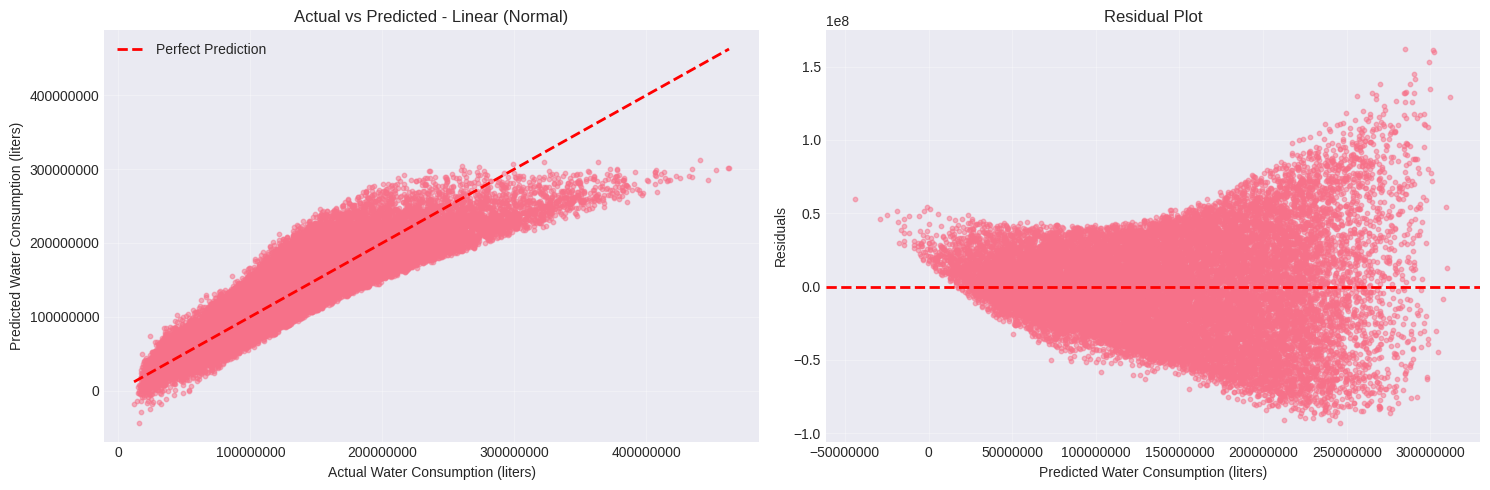

In [49]:
# Actual vs Predicted plots for best model
best_predictions = results[best_model_name]['y_test_pred']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot
axes[0].scatter(y_test, best_predictions, alpha=0.5, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Water Consumption (liters)')
axes[0].set_ylabel('Predicted Water Consumption (liters)')
axes[0].set_title(f'Actual vs Predicted - {best_model_name}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].ticklabel_format(style='plain', axis='both')

# Residual plot
residuals = y_test - best_predictions
axes[1].scatter(best_predictions, residuals, alpha=0.5, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Water Consumption (liters)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(True, alpha=0.3)
axes[1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

### Distribution of residuals

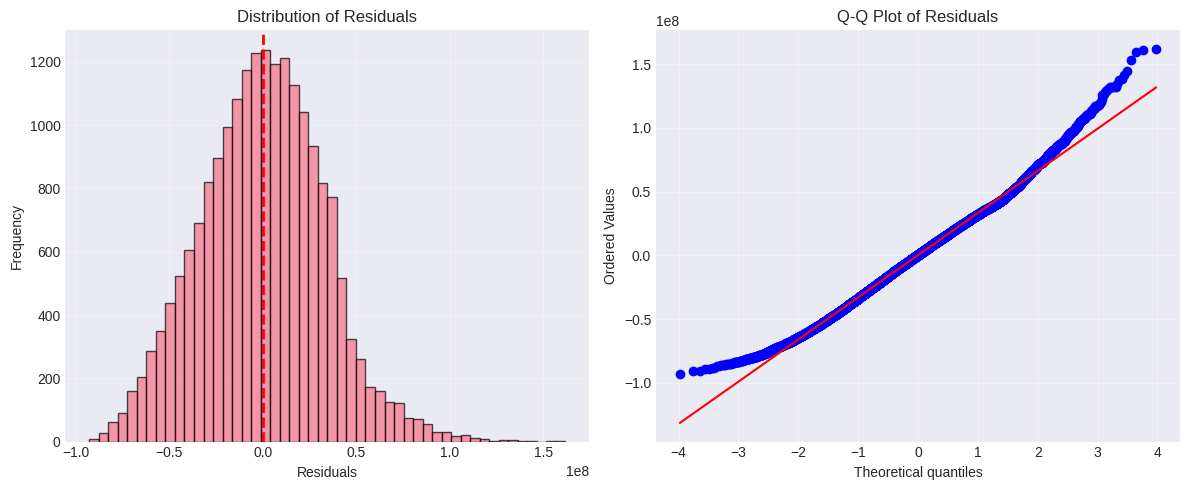

Mean of residuals: 131,525.72
Std of residuals: 33,164,814.19


In [50]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean of residuals: {residuals.mean():,.2f}")
print(f"Std of residuals: {residuals.std():,.2f}")

# 10.Feature Importance Analysis

In [51]:
# Get feature importance from Linear Regression (Normal Equation)
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_normal.weights,
    'Abs_Coefficient': np.abs(lr_normal.weights)
}).sort_values('Abs_Coefficient', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

Top 15 Most Important Features:
                  Feature   Coefficient  Abs_Coefficient
               population  6.216288e+07     6.216288e+07
      temperature_celsius  5.320201e+07     5.320201e+07
               heat_index -4.203970e+07     4.203970e+07
        area_type_encoded  1.865022e+07     1.865022e+07
industrial_activity_index  9.197328e+06     9.197328e+06
              rainfall_mm -6.104840e+06     6.104840e+06
               is_weekend  4.789943e+06     4.789943e+06
         humidity_percent  4.234717e+06     4.234717e+06
  min_temperature_celsius -9.931706e+05     9.931706e+05
               is_holiday  7.891035e+05     7.891035e+05
  max_temperature_celsius  5.567337e+05     5.567337e+05
                    month -2.841147e+05     2.841147e+05
     number_of_households  2.371927e+05     2.371927e+05
           season_encoded -2.217400e+05     2.217400e+05
  reservoir_level_percent  1.834580e+05     1.834580e+05


### Visualize feature importance

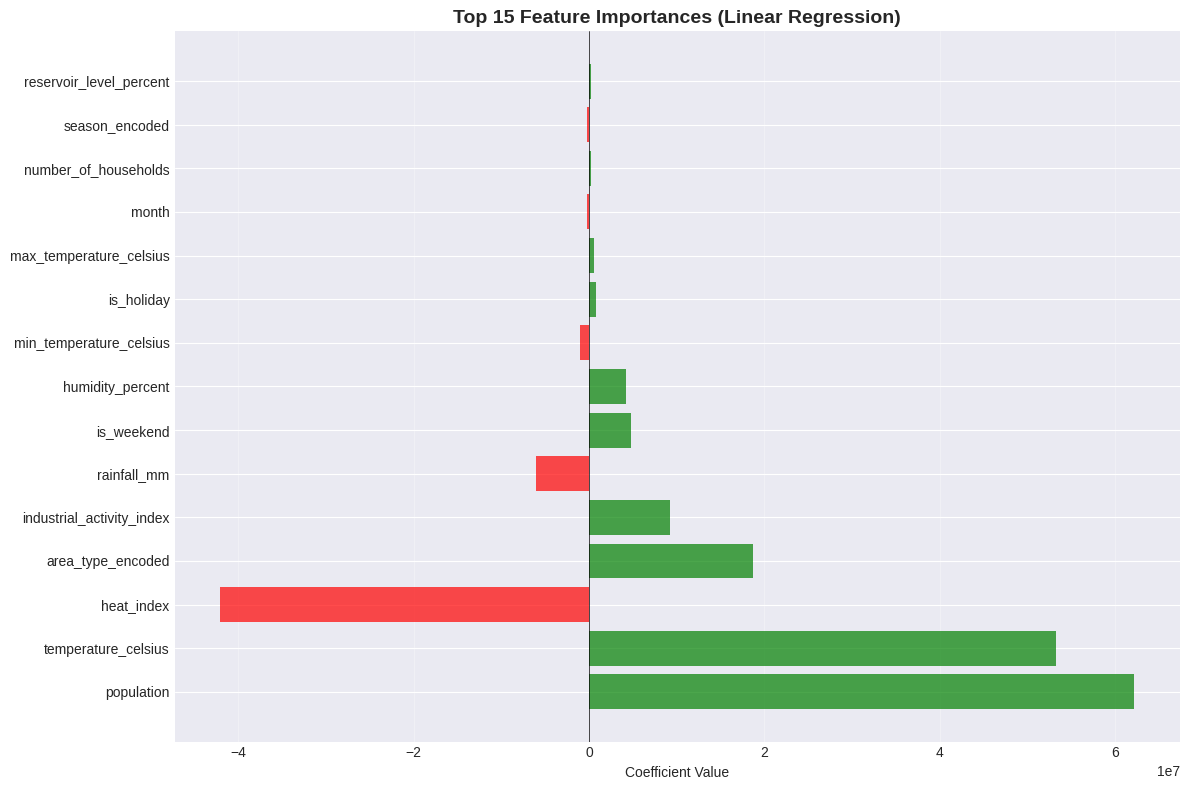

In [52]:

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]

plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Feature Importances (Linear Regression)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 11.Model Comparison Visualization

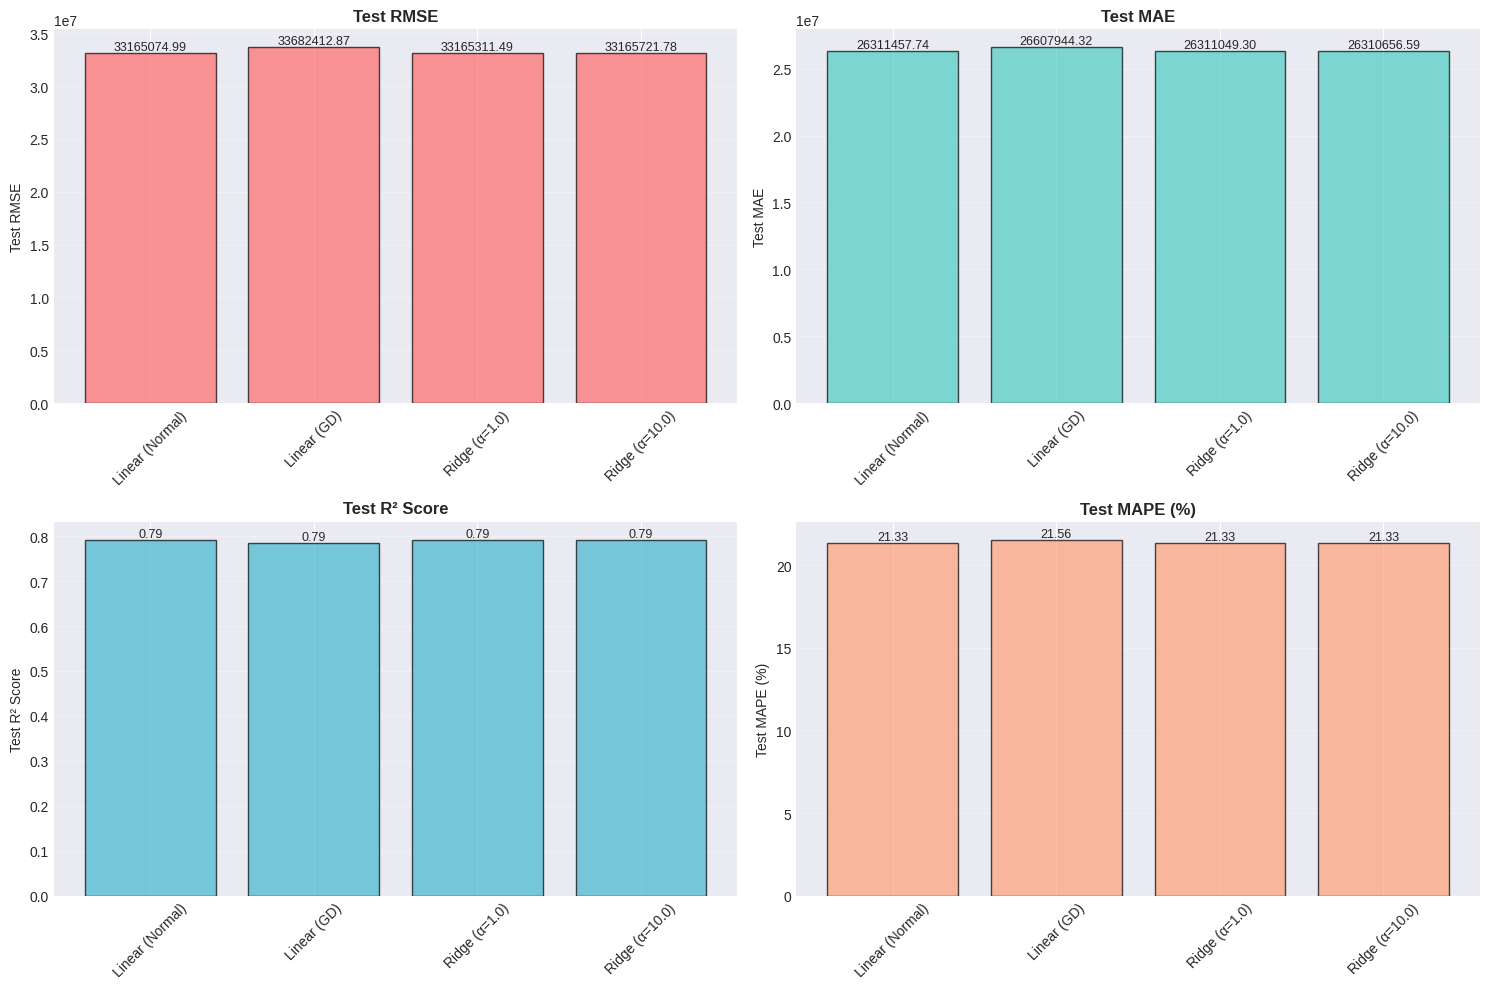

In [53]:
# Compare model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

models_list = list(results.keys())
metrics = ['test_rmse', 'test_mae', 'test_r2', 'test_mape']
titles = ['Test RMSE', 'Test MAE', 'Test R² Score', 'Test MAPE (%)']
colors_palette = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, (ax, metric, title, color) in enumerate(zip(axes.flat, metrics, titles, colors_palette)):
    values = [results[model][metric] for model in models_list]
    ax.bar(models_list, values, color=color, alpha=0.7, edgecolor='black')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_ylabel(title)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3, axis='y')

    # Add value labels on bars
    for i, v in enumerate(values):
        ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 12.Make Predictions on New Data

In [54]:
#  Make prdictions for specific scenarios

# Get the best model
if best_model_name == 'Linear (Normal)':
    best_model = lr_normal
elif best_model_name == 'Linear (GD)':
    best_model = lr_gd
elif 'Ridge' in best_model_name:
    alpha_value = float(best_model_name.split('α=')[1].strip(')'))
    best_model = ridge_models[alpha_value]

# Take some random samples from test set
sample_indices = np.random.choice(len(X_test), 10, replace=False)
X_samples = X_test[sample_indices]
y_samples = y_test[sample_indices]

# Scale samples
X_samples_scaled = scaler.transform(X_samples)

# Make predictions
predictions = best_model.predict(X_samples_scaled)

# Display results
comparison = pd.DataFrame({
    'Actual': y_samples,
    'Predicted': predictions,
    'Error': y_samples - predictions,
    'Error %': ((y_samples - predictions) / y_samples * 100)
})

print("Sample Predictions:")
print(comparison.to_string(index=False))
print(f"\nMean Absolute Error: {np.abs(comparison['Error']).mean():,.2f}")
print(f"Mean Absolute Percentage Error: {np.abs(comparison['Error %']).mean():.2f}%")

Sample Predictions:
   Actual    Predicted         Error    Error %
 80809361 5.655912e+07  2.425024e+07  30.009201
 68128908 8.823967e+07 -2.011077e+07 -29.518697
 71665924 6.872962e+07  2.936299e+06   4.097204
152507097 2.045590e+08 -5.205189e+07 -34.130796
 92730696 9.570685e+07 -2.976153e+06  -3.209459
227633348 2.139282e+08  1.370512e+07   6.020698
324806151 2.534335e+08  7.137267e+07  21.973929
116770915 1.217507e+08 -4.979807e+06  -4.264595
134315915 1.654434e+08 -3.112748e+07 -23.174829
121069821 1.784785e+08 -5.740871e+07 -47.417853

Mean Absolute Error: 28,091,913.63
Mean Absolute Percentage Error: 20.38%


## 13.Summary and Conclusions

In [55]:
print("="*70)
print("WATER CONSUMPTION PREDICTION - MODEL SUMMARY")
print("="*70)
print(f"\nDataset Size: {len(df):,} samples")
print(f"Training Set: {len(X_train):,} samples")
print(f"Test Set: {len(X_test):,} samples")
print(f"Number of Features: {X.shape[1]}")
print(f"\nModels Implemented:")
print("  1. Linear Regression (Normal Equation)")
print("  2. Linear Regression (Gradient Descent)")
print("  3. Ridge Regression (Multiple α values)")
print(f"\nBest Model: {best_model_name}")
print(f"  - Test R² Score: {results[best_model_name]['test_r2']:.4f}")
print(f"  - Test RMSE: {results[best_model_name]['test_rmse']:,.2f} liters")
print(f"  - Test MAE: {results[best_model_name]['test_mae']:,.2f} liters")
print(f"  - Test MAPE: {results[best_model_name]['test_mape']:.2f}%")
print(f"\nTop 5 Most Important Features:")
for i, row in feature_importance.head(5).iterrows():
    print(f"  {i+1}. {row['Feature']}: {row['Coefficient']:,.2f}")
print("\n" + "="*70)
print("All models have been successfully trained and evaluated!")
print("="*70)

WATER CONSUMPTION PREDICTION - MODEL SUMMARY

Dataset Size: 100,000 samples
Training Set: 80,000 samples
Test Set: 20,000 samples
Number of Features: 21

Models Implemented:
  1. Linear Regression (Normal Equation)
  2. Linear Regression (Gradient Descent)
  3. Ridge Regression (Multiple α values)

Best Model: Linear (Normal)
  - Test R² Score: 0.7925
  - Test RMSE: 33,165,074.99 liters
  - Test MAE: 26,311,457.74 liters
  - Test MAPE: 21.33%

Top 5 Most Important Features:
  8. population: 62,162,876.28
  1. temperature_celsius: 53,202,008.37
  7. heat_index: -42,039,699.41
  21. area_type_encoded: 18,650,216.06
  10. industrial_activity_index: 9,197,327.93

All models have been successfully trained and evaluated!


## 14.Save the Best Model

In [56]:
import pickle

# Save the model and scaler
model_data = {
    'model': best_model,
    'scaler': scaler,
    'feature_columns': feature_columns,
    'label_encoders': label_encoders,
    'model_name': best_model_name,
    'metrics': results[best_model_name]
}

with open('water_consumption_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("Model saved successfully as 'water_consumption_model.pkl'")
print("\nTo load the model later, use:")
print("with open('water_consumption_model.pkl', 'rb') as f:")
print("    model_data = pickle.load(f)")
print("    model = model_data['model']")
print("    scaler = model_data['scaler']")

Model saved successfully as 'water_consumption_model.pkl'

To load the model later, use:
with open('water_consumption_model.pkl', 'rb') as f:
    model_data = pickle.load(f)
    model = model_data['model']
    scaler = model_data['scaler']
